In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D

In [5]:
import tensorflow as tf
import keras
import os 
import time
#import cv2
import numpy as np
#import matplotlib.pyplot as plt
from keras import optimizers
import keras
import tensorflow as tf
import keras.backend as K
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import load_model
from keras.models import Sequential
from keras.regularizers import l2
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
#import matplotlib.pyplot as plt
#from tqdm import tqdm
from keras.utils import np_utils
#from imgaug import augmenters as iaa    
import itertools
%matplotlib inline
#import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import CSVLogger
#from livelossplot import PlotLossesKeras
import os
#from classification_models.keras import Classifiers
# GPU test
from tensorflow.python.client import device_lib
np.random.seed(42)
from keras.models import load_model
# Print version
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Activation, merge, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras.models import Model
from keras.layers import Input, Activation, merge, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.applications.vgg16 import VGG16
from keras.regularizers import l2
import os, sys
import scipy.misc
from glob import glob
import numpy as np
import random 
import shutil 
import keras
import time
import matplotlib.pyplot as plt
from keras.layers import Dense, Input, Conv2D, Flatten, MaxPool2D, Activation,Dropout, GlobalAveragePooling2D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras import backend as K
from keras.models import Sequential
from keras.applications.densenet import DenseNet121
from keras.models import load_model
from tensorflow.keras.optimizers import Adam
from keras import optimizers
import pickle
import sys


import tensorflow as tf


np.random.seed(1)

In [6]:
train_dir = "C:/Users/Havoc/OneDrive/Documents/chest_xray/chest_xray/train"
valid_dir = "C:/Users/Havoc/OneDrive/Documents/chest_xray/chest_xray/val"

img_width, img_height = 224, 224 

In [7]:
conv_base = tf.keras.applications.DenseNet169(
    include_top=False,
    weights="imagenet",
    input_shape=(img_width, img_height, 3),
)


conv_base.summary()

51888128/51877672 [==============================] - 21s 0us/step
Model: "densenet169"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                      

 ization)                                                                                         
                                                                                                  
 conv2_block4_0_relu (Activatio  (None, 56, 56, 160)  0          ['conv2_block4_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block4_1_conv (Conv2D)   (None, 56, 56, 128)  20480       ['conv2_block4_0_relu[0][0]']    
                                                                                                  
 conv2_block4_1_bn (BatchNormal  (None, 56, 56, 128)  512        ['conv2_block4_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_blo

 conv3_block2_0_bn (BatchNormal  (None, 28, 28, 160)  640        ['conv3_block1_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_0_relu (Activatio  (None, 28, 28, 160)  0          ['conv3_block2_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_1_conv (Conv2D)   (None, 28, 28, 128)  20480       ['conv3_block2_0_relu[0][0]']    
                                                                                                  
 conv3_block2_1_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block2_1_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 conv3_block6_1_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block6_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block6_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block6_2_conv (Conv2D)   (None, 28, 28, 32)   36864       ['conv3_block6_1_relu[0][0]']    
                                                                                                  
 conv3_block6_concat (Concatena  (None, 28, 28, 320)  0          ['conv3_block5_concat[0][0]',    
 te)      

 conv3_block10_2_conv (Conv2D)  (None, 28, 28, 32)   36864       ['conv3_block10_1_relu[0][0]']   
                                                                                                  
 conv3_block10_concat (Concaten  (None, 28, 28, 448)  0          ['conv3_block9_concat[0][0]',    
 ate)                                                             'conv3_block10_2_conv[0][0]']   
                                                                                                  
 conv3_block11_0_bn (BatchNorma  (None, 28, 28, 448)  1792       ['conv3_block10_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv3_block11_0_relu (Activati  (None, 28, 28, 448)  0          ['conv3_block11_0_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 32)   36864       ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_concat (Concatena  (None, 14, 14, 320)  0          ['conv4_block1_concat[0][0]',    
 te)                                                              'conv4_block2_2_conv[0][0]']    
                                                                                                  
 conv4_block3_0_bn (BatchNormal  (None, 14, 14, 320)  1280       ['conv4_block2_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block3_0_relu (Activatio  (None, 14, 14, 320)  0          ['conv4_block3_0_bn[0][0]']      
 n)       

 ization)                                                                                         
                                                                                                  
 conv4_block7_0_relu (Activatio  (None, 14, 14, 448)  0          ['conv4_block7_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block7_1_conv (Conv2D)   (None, 14, 14, 128)  57344       ['conv4_block7_0_relu[0][0]']    
                                                                                                  
 conv4_block7_1_bn (BatchNormal  (None, 14, 14, 128)  512        ['conv4_block7_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_blo

 conv4_block11_1_bn (BatchNorma  (None, 14, 14, 128)  512        ['conv4_block11_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block11_1_relu (Activati  (None, 14, 14, 128)  0          ['conv4_block11_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block11_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block11_1_relu[0][0]']   
                                                                                                  
 conv4_block11_concat (Concaten  (None, 14, 14, 608)  0          ['conv4_block10_concat[0][0]',   
 ate)                                                             'conv4_block11_2_conv[0][0]']   
          

                                                                                                  
 conv4_block15_concat (Concaten  (None, 14, 14, 736)  0          ['conv4_block14_concat[0][0]',   
 ate)                                                             'conv4_block15_2_conv[0][0]']   
                                                                                                  
 conv4_block16_0_bn (BatchNorma  (None, 14, 14, 736)  2944       ['conv4_block15_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block16_0_relu (Activati  (None, 14, 14, 736)  0          ['conv4_block16_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_blo

 conv4_block20_0_relu (Activati  (None, 14, 14, 864)  0          ['conv4_block20_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block20_1_conv (Conv2D)  (None, 14, 14, 128)  110592      ['conv4_block20_0_relu[0][0]']   
                                                                                                  
 conv4_block20_1_bn (BatchNorma  (None, 14, 14, 128)  512        ['conv4_block20_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block20_1_relu (Activati  (None, 14, 14, 128)  0          ['conv4_block20_1_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv4_block24_1_relu (Activati  (None, 14, 14, 128)  0          ['conv4_block24_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block24_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block24_1_relu[0][0]']   
                                                                                                  
 conv4_block24_concat (Concaten  (None, 14, 14, 1024  0          ['conv4_block23_concat[0][0]',   
 ate)                           )                                 'conv4_block24_2_conv[0][0]']   
                                                                                                  
 conv4_block25_0_bn (BatchNorma  (None, 14, 14, 1024  4096       ['conv4_block24_concat[0][0]']   
 lization)

 ate)                           )                                 'conv4_block28_2_conv[0][0]']   
                                                                                                  
 conv4_block29_0_bn (BatchNorma  (None, 14, 14, 1152  4608       ['conv4_block28_concat[0][0]']   
 lization)                      )                                                                 
                                                                                                  
 conv4_block29_0_relu (Activati  (None, 14, 14, 1152  0          ['conv4_block29_0_bn[0][0]']     
 on)                            )                                                                 
                                                                                                  
 conv4_block29_1_conv (Conv2D)  (None, 14, 14, 128)  147456      ['conv4_block29_0_relu[0][0]']   
                                                                                                  
 conv4_blo

                                                                                                  
 pool4_conv (Conv2D)            (None, 14, 14, 640)  819200      ['pool4_relu[0][0]']             
                                                                                                  
 pool4_pool (AveragePooling2D)  (None, 7, 7, 640)    0           ['pool4_conv[0][0]']             
                                                                                                  
 conv5_block1_0_bn (BatchNormal  (None, 7, 7, 640)   2560        ['pool4_pool[0][0]']             
 ization)                                                                                         
                                                                                                  
 conv5_block1_0_relu (Activatio  (None, 7, 7, 640)   0           ['conv5_block1_0_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv5_block5_0_relu (Activatio  (None, 7, 7, 768)   0           ['conv5_block5_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block5_1_conv (Conv2D)   (None, 7, 7, 128)    98304       ['conv5_block5_0_relu[0][0]']    
                                                                                                  
 conv5_block5_1_bn (BatchNormal  (None, 7, 7, 128)   512         ['conv5_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block5_1_relu (Activatio  (None, 7, 7, 128)   0           ['conv5_block5_1_bn[0][0]']      
 n)       

 ization)                                                                                         
                                                                                                  
 conv5_block9_1_relu (Activatio  (None, 7, 7, 128)   0           ['conv5_block9_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block9_2_conv (Conv2D)   (None, 7, 7, 32)     36864       ['conv5_block9_1_relu[0][0]']    
                                                                                                  
 conv5_block9_concat (Concatena  (None, 7, 7, 928)   0           ['conv5_block8_concat[0][0]',    
 te)                                                              'conv5_block9_2_conv[0][0]']    
                                                                                                  
 conv5_blo

 conv5_block13_concat (Concaten  (None, 7, 7, 1056)  0           ['conv5_block12_concat[0][0]',   
 ate)                                                             'conv5_block13_2_conv[0][0]']   
                                                                                                  
 conv5_block14_0_bn (BatchNorma  (None, 7, 7, 1056)  4224        ['conv5_block13_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block14_0_relu (Activati  (None, 7, 7, 1056)  0           ['conv5_block14_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block14_1_conv (Conv2D)  (None, 7, 7, 128)    135168      ['conv5_block14_0_relu[0][0]']   
          

 on)                                                                                              
                                                                                                  
 conv5_block18_1_conv (Conv2D)  (None, 7, 7, 128)    151552      ['conv5_block18_0_relu[0][0]']   
                                                                                                  
 conv5_block18_1_bn (BatchNorma  (None, 7, 7, 128)   512         ['conv5_block18_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block18_1_relu (Activati  (None, 7, 7, 128)   0           ['conv5_block18_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_blo

 conv5_block22_1_relu (Activati  (None, 7, 7, 128)   0           ['conv5_block22_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block22_2_conv (Conv2D)  (None, 7, 7, 32)     36864       ['conv5_block22_1_relu[0][0]']   
                                                                                                  
 conv5_block22_concat (Concaten  (None, 7, 7, 1344)  0           ['conv5_block21_concat[0][0]',   
 ate)                                                             'conv5_block22_2_conv[0][0]']   
                                                                                                  
 conv5_block23_0_bn (BatchNorma  (None, 7, 7, 1344)  5376        ['conv5_block22_concat[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 conv5_block27_0_bn (BatchNorma  (None, 7, 7, 1472)  5888        ['conv5_block26_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block27_0_relu (Activati  (None, 7, 7, 1472)  0           ['conv5_block27_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block27_1_conv (Conv2D)  (None, 7, 7, 128)    188416      ['conv5_block27_0_relu[0][0]']   
                                                                                                  
 conv5_block27_1_bn (BatchNorma  (None, 7, 7, 128)   512         ['conv5_block27_1_conv[0][0]']   
 lization)

 conv5_block31_1_conv (Conv2D)  (None, 7, 7, 128)    204800      ['conv5_block31_0_relu[0][0]']   
                                                                                                  
 conv5_block31_1_bn (BatchNorma  (None, 7, 7, 128)   512         ['conv5_block31_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block31_1_relu (Activati  (None, 7, 7, 128)   0           ['conv5_block31_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block31_2_conv (Conv2D)  (None, 7, 7, 32)     36864       ['conv5_block31_1_relu[0][0]']   
                                                                                                  
 conv5_blo

In [13]:
import os, shutil
from keras.preprocessing.image import ImageDataGenerator



datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 7, 7, 1664)) # Must be equal to the output of the convolutional base
    labels = np.zeros(shape=(sample_count,2))
    # Preprocess data
    generator = datagen.flow_from_directory(directory,
                                            target_size=(img_width,img_height),
                                            batch_size = batch_size,
                                            class_mode='categorical')
 
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size: (i + 1) * batch_size] = features_batch
        labels[i * batch_size: (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels
train_features, train_labels = extract_features(train_dir, 1227) 
validation_features, validation_labels = extract_features(valid_dir, 16)

Found 1227 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [14]:
train_features.shape

(1227, 7, 7, 1664)

In [15]:
validation_features.shape

(16, 7, 7, 1664)

In [16]:
train_labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [17]:
epochs = 150

model = Sequential()
model.add(GlobalAveragePooling2D(input_shape=(7, 7, 1664)))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 global_average_pooling2d (G  (None, 1664)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 2)                 3330      
                                                                 
Total params: 3,330
Trainable params: 3,330
Non-trainable params: 0
_________________________________________________________________


In [19]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('model-{epoch:03d}-{acc:03f}-{val_acc:03f}.h5', verbose=1, monitor='val_loss',save_best_only=True, mode='auto')  


from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['acc'])


history = model.fit(train_features, train_labels,
                    epochs=epochs,
                    batch_size=batch_size, 
                    callbacks=[checkpoint],
                    validation_data=(validation_features, validation_labels))

Epoch 1/150
36/39 [==========================>...] - ETA: 0s - loss: 0.2589 - acc: 0.9193
Epoch 1: val_loss improved from inf to 0.84667, saving model to model-001-0.920130-0.500000.h5
39/39 [==============================] - 0s 6ms/step - loss: 0.2532 - acc: 0.9201 - val_loss: 0.8467 - val_acc: 0.5000
Epoch 2/150
37/39 [===========================>..] - ETA: 0s - loss: 0.1140 - acc: 0.9510
Epoch 2: val_loss did not improve from 0.84667
39/39 [==============================] - 0s 3ms/step - loss: 0.1116 - acc: 0.9527 - val_loss: 0.9552 - val_acc: 0.5000
Epoch 3/150
37/39 [===========================>..] - ETA: 0s - loss: 0.0694 - acc: 0.9738
Epoch 3: val_loss did not improve from 0.84667
39/39 [==============================] - 0s 3ms/step - loss: 0.0720 - acc: 0.9731 - val_loss: 1.2130 - val_acc: 0.5000
Epoch 4/150
32/39 [=======================>......] - ETA: 0s - loss: 0.0498 - acc: 0.9893
Epoch 4: val_loss did not improve from 0.84667
39/39 [==============================] - 0s 4ms

Epoch 33/150
38/39 [============================>.] - ETA: 0s - loss: 0.0040 - acc: 1.0000
Epoch 33: val_loss did not improve from 0.84667
39/39 [==============================] - 0s 3ms/step - loss: 0.0039 - acc: 1.0000 - val_loss: 2.2687 - val_acc: 0.5000
Epoch 34/150
35/39 [=========================>....] - ETA: 0s - loss: 0.0038 - acc: 1.0000
Epoch 34: val_loss did not improve from 0.84667
39/39 [==============================] - 0s 4ms/step - loss: 0.0037 - acc: 1.0000 - val_loss: 2.2233 - val_acc: 0.5000
Epoch 35/150
32/39 [=======================>......] - ETA: 0s - loss: 0.0037 - acc: 1.0000
Epoch 35: val_loss did not improve from 0.84667
39/39 [==============================] - 0s 4ms/step - loss: 0.0037 - acc: 1.0000 - val_loss: 2.2485 - val_acc: 0.5000
Epoch 36/150
37/39 [===========================>..] - ETA: 0s - loss: 0.0033 - acc: 1.0000
Epoch 36: val_loss did not improve from 0.84667
39/39 [==============================] - 0s 3ms/step - loss: 0.0034 - acc: 1.0000 - val

Epoch 65/150
37/39 [===========================>..] - ETA: 0s - loss: 0.0012 - acc: 1.0000
Epoch 65: val_loss did not improve from 0.84667
39/39 [==============================] - 0s 3ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 2.7773 - val_acc: 0.5000
Epoch 66/150
36/39 [==========================>...] - ETA: 0s - loss: 0.0012 - acc: 1.0000   
Epoch 66: val_loss did not improve from 0.84667
39/39 [==============================] - 0s 3ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 2.7525 - val_acc: 0.5000
Epoch 67/150
38/39 [============================>.] - ETA: 0s - loss: 0.0013 - acc: 1.0000
Epoch 67: val_loss did not improve from 0.84667
39/39 [==============================] - 0s 3ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 2.8878 - val_acc: 0.5000
Epoch 68/150
36/39 [==========================>...] - ETA: 0s - loss: 0.0011 - acc: 1.0000   
Epoch 68: val_loss did not improve from 0.84667
39/39 [==============================] - 0s 3ms/step - loss: 0.0011 - acc: 1.0000

Epoch 96/150
39/39 [==============================] - ETA: 0s - loss: 6.0153e-04 - acc: 1.0000
Epoch 96: val_loss did not improve from 0.84667
39/39 [==============================] - 0s 3ms/step - loss: 6.0153e-04 - acc: 1.0000 - val_loss: 2.9102 - val_acc: 0.5000
Epoch 97/150
38/39 [============================>.] - ETA: 0s - loss: 5.3567e-04 - acc: 1.0000
Epoch 97: val_loss did not improve from 0.84667
39/39 [==============================] - 0s 3ms/step - loss: 5.3110e-04 - acc: 1.0000 - val_loss: 3.1131 - val_acc: 0.5000
Epoch 98/150
35/39 [=========================>....] - ETA: 0s - loss: 5.5011e-04 - acc: 1.0000
Epoch 98: val_loss did not improve from 0.84667
39/39 [==============================] - 0s 3ms/step - loss: 5.3828e-04 - acc: 1.0000 - val_loss: 3.0601 - val_acc: 0.5000
Epoch 99/150
37/39 [===========================>..] - ETA: 0s - loss: 5.2301e-04 - acc: 1.0000
Epoch 99: val_loss did not improve from 0.84667
39/39 [==============================] - 0s 3ms/step - loss

Epoch 127/150
35/39 [=========================>....] - ETA: 0s - loss: 2.8811e-04 - acc: 1.0000
Epoch 127: val_loss did not improve from 0.84667
39/39 [==============================] - 0s 3ms/step - loss: 2.8507e-04 - acc: 1.0000 - val_loss: 3.2148 - val_acc: 0.5000
Epoch 128/150
35/39 [=========================>....] - ETA: 0s - loss: 2.5761e-04 - acc: 1.0000
Epoch 128: val_loss did not improve from 0.84667
39/39 [==============================] - 0s 3ms/step - loss: 2.7189e-04 - acc: 1.0000 - val_loss: 3.4020 - val_acc: 0.5000
Epoch 129/150
34/39 [=========================>....] - ETA: 0s - loss: 2.7775e-04 - acc: 1.0000
Epoch 129: val_loss did not improve from 0.84667
39/39 [==============================] - 0s 4ms/step - loss: 2.6968e-04 - acc: 1.0000 - val_loss: 3.3224 - val_acc: 0.5000
Epoch 130/150
38/39 [============================>.] - ETA: 0s - loss: 2.6377e-04 - acc: 1.0000
Epoch 130: val_loss did not improve from 0.84667
39/39 [==============================] - 0s 3ms/ste

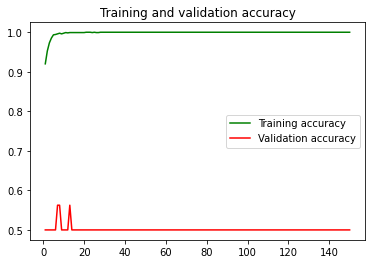

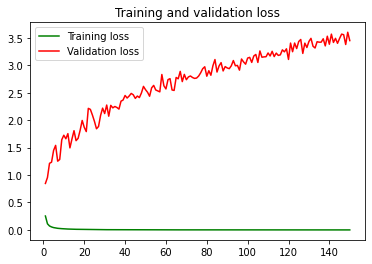

In [20]:
# Plot results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [21]:
from keras.preprocessing import image
def prediction(img_path):
    org_img = image.load_img(img_path)
    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_tensor = image.img_to_array(img)  
    img_tensor /= 255.  
    plt.imshow(org_img)                           
    plt.axis('off')
    plt.show()


    # Extract features
    features = conv_base.predict(img_tensor.reshape(1,img_width, img_height, 3))

    # Make prediction
    try:
        prediction = model.predict(features)
    except:
        prediction = model.predict(features.reshape(1, 7*7*1024))
        
    classes = ["covid","noncovid"]
    print("I see..."+str(classes[np.argmax(np.array(prediction[0]))]))

In [25]:
prediction = model.predict(validation_features)

In [26]:
prediction.shape

(16, 2)

In [27]:
pred = np.argmax(prediction, axis=1)
# label
validation_labels = np.argmax(validation_labels, axis=1)

In [28]:
print(validation_labels.shape, pred.shape)

(16,) (16,)


In [30]:
print(classification_report(validation_labels, pred, target_names = ['Covid','NonCovid']))

              precision    recall  f1-score   support

       Covid       0.00      0.00      0.00         8
    NonCovid       0.50      1.00      0.67         8

    accuracy                           0.50        16
   macro avg       0.25      0.50      0.33        16
weighted avg       0.25      0.50      0.33        16



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
